In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

### Load data

In [2]:
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [3]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


### choose data

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    test_sample = X_train[idxs]
    if y == 0:
        X_sample = test_sample
    else:
        X_sample = np.vstack((X_sample,test_sample))
print('Sample data shape: ',X_sample.shape)

Sample data shape:  (70, 32, 32, 3)


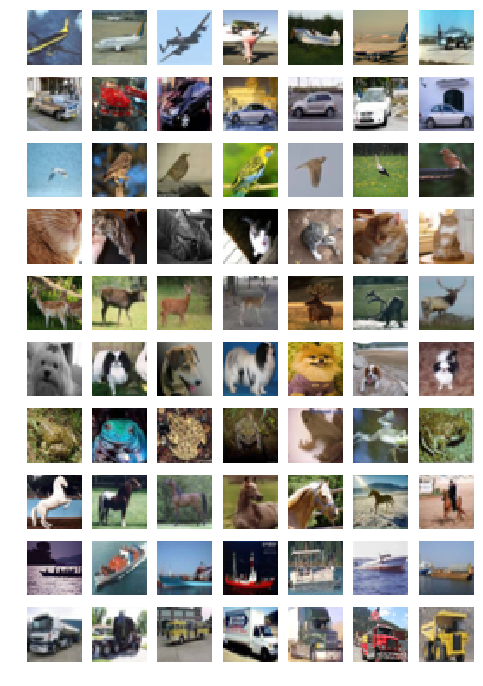

In [5]:
# 画出原始数据
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


samples_row = 10
samples_col = X_sample.shape[0] // samples_row
# print(samples_col)

for x in range(samples_row):
    for y in range(samples_col):
        plt_idx = x * samples_col + y + 1
#         print(x,y)
        plt.subplot(samples_row, samples_col, plt_idx)
        plt.imshow(X_sample[plt_idx -1].astype('uint8'))
        plt.axis('off')
plt.show()

In [6]:
X_sample = np.reshape(X_sample, (X_sample.shape[0], -1))
print('X_sample shape:',X_sample.shape)
print('a sample in X_sample', X_sample[0])

X_sample shape: (70, 3072)
a sample in X_sample [155. 199. 223. ...  73.  76.  99.]


### 减去均值

In [7]:
X = X_sample
X -= np.mean(X,axis=0)
print('X_sample shape:',X.shape)
print('a sample in X_sample:', X[0])

X_sample shape: (70, 3072)
a sample in X_sample: [ 40.44285714  77.78571429 106.18571429 ... -36.92857143 -35.87142857
  -2.4       ]


### 求协方差
数据协方差矩阵的第(i, j)个元素是数据第i个和第j个维度的协方差。
具体来说，该矩阵的对角线上的元素是方差。
协方差矩阵是对称和半正定的。

In [8]:
cov = np.dot(X.T, X) / X.shape[0]
print('cov shape:',cov.shape)
print('a sample in cov:', cov[0])

cov shape: (3072, 3072)
a sample in cov: [4548.13244898 4416.50918367 4333.26061224 ...  397.58265306  192.98591837
  514.13428571]


### 奇异值分解
U的列是特征向量，S是装有奇异值的1维数组（因为cov是对称且半正定的，所以S中元素是特征值的平方）。

In [9]:
U, S, V = np.linalg.svd(cov)
print('U，S，V shape:',U.shape, S.shape, V.shape)
print('a sample in U:', U[0])
print('a sample in S:', S[0])
print('a sample in V:', V[0])

U，S，V shape: (3072, 3072) (3072,) (3072, 3072)
a sample in U: [-0.02354573 -0.02318035 -0.01099309 ...  0.00099416  0.00227837
 -0.20369128]
a sample in S: 3186471.4370919303
a sample in V: [-0.02354573 -0.02822719 -0.03227973 ... -0.0126889  -0.01314046
 -0.0175211 ]


对数据去相关,将已经零中心化处理过的原始数据投影到特征基准上。

In [10]:
Xrot = np.dot(X, U)
print('Xrot shape:',Xrot.shape)
print('a sample in Xrot:', Xrot[0])

Xrot shape: (70, 3072)
a sample in Xrot: [-2.10184427e+02 -4.15796005e+02  5.20963186e+02 ...  1.42108547e-14
 -3.58824082e-13 -3.04112291e-12]


注意U的列是标准正交向量的集合（范式为1，列之间标准正交），所以可以把它们看做标准正交基向量。因此，投影对应x中的数据的一个旋转，旋转产生的结果就是新的特征向量。如果计算Xrot的协方差矩阵，将会看到它是对角对称的。

In [11]:
cov_rot = np.dot(Xrot.T, Xrot) / Xrot.shape[0]
print('cov_rot shape:',cov_rot.shape)
print('a sample in cov_rot:', cov_rot[0])

cov_rot shape: (3072, 3072)
a sample in cov_rot: [ 3.18647144e+06 -5.27448047e-09  2.24872013e-10 ...  4.39300037e-11
 -2.12050900e-10  3.30534125e-10]


### 降维
np.linalg.svd的一个良好性质是在它的返回值U中，特征向量是按照特征值的大小排列的。我们可以利用这个性质来对数据降维，只要使用前面的小部分特征向量，丢弃掉那些包含的数据没有方差的维度。

In [12]:
Xrot_reduced = np.dot(X, U[:,:100])
print('Xrot_reduced shape:',Xrot_reduced.shape)
print('a sample in Xrot_reduced:', Xrot_reduced[0])

Xrot_reduced shape: (70, 100)
a sample in Xrot_reduced: [-2.10184427e+02 -4.15796005e+02  5.20963186e+02  7.63327959e+02
  5.86671782e+02  5.27157470e+02 -3.19436916e+02 -3.59244807e+02
 -3.43512279e+02  1.84697186e+02  8.07546410e+01 -1.41477671e+02
  1.36978047e+02  4.96419293e+01 -4.12002061e+01  2.06955438e+01
 -9.59065078e+01 -7.74189989e+01  1.56005074e+02  2.23014283e+02
 -3.19647736e+02  6.62617424e+01 -3.53157565e+01  2.66737966e+02
 -3.80747224e+01  2.09649451e+01  1.22155148e+01  4.52580623e+02
 -2.42406176e+02  4.96744196e+00 -3.36199371e+02 -3.49252934e+02
  1.83050197e+02 -3.80484958e+02  6.32512354e+01 -2.14292559e+02
  1.91517868e+02 -8.86155278e+01  1.90861338e+02  7.31727951e+01
  3.94895339e+02  2.63824373e+02  4.25582564e+02 -2.39512833e+02
 -2.63774503e+02  1.88187893e+01  5.95765196e+01 -3.55099620e+02
  3.45865000e+02 -2.89001796e+01  9.08932322e+01  1.48401174e+02
 -3.66455178e+01  3.62376312e+02 -2.56850938e+02  3.61147089e+01
  5.20887746e+01 -1.15917567e+02  

### 白化（whitening)
白化操作的输入是特征基准上的数据，然后对每个维度除以其特征值来对数值范围进行归一化。该变换的几何解释是：如果数据服从多变量的高斯分布，那么经过白化后，数据的分布将会是一个均值为零，且协方差相等的矩阵.

In [13]:
X_white = Xrot / np.sqrt(S + 1e-5)
print('X_white shape:',X_white.shape)
print('a sample in X_white:', X_white[0])

X_white shape: (70, 3072)
a sample in X_white: [-1.17745826e-01 -3.42311604e-01  6.18457526e-01 ...  4.49380293e-12
 -1.13469452e-10 -9.61683537e-10]


In [14]:
X_white_mean = np.mean(X_white,axis=0)
X_white_var = np.var(X_white,axis=0)
print('X_white_mean shape:',X_white_mean.shape)
print('2 sample in X_white_mean:', X_white_mean[0], X_white_mean[1])
print('X_white_var shape:',X_white_var.shape)
print('2 samples in X_white_var:', X_white_var[0], X_white_var[1])

X_white_mean shape: (3072,)
2 sample in X_white_mean: 1.2291754915492804e-17 -1.0150610510858574e-16
X_white_var shape: (3072,)
2 samples in X_white_var: 0.9999999999968633 0.9999999999932226


(70, 3072)
(70, 32, 32, 3)


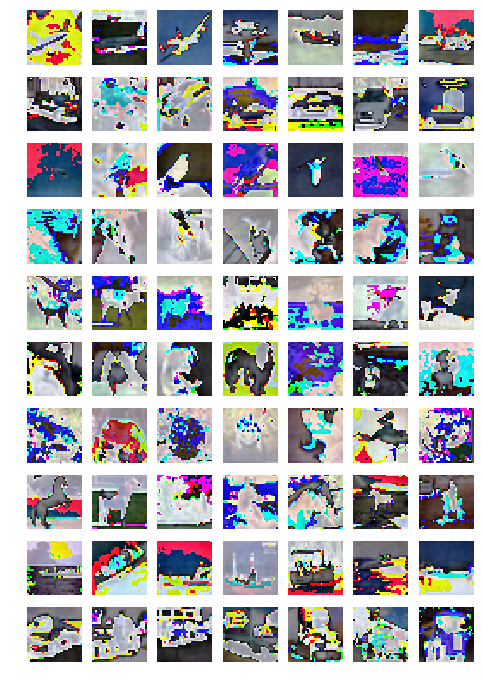

In [15]:
samples_row = 10
samples_col = X_sample.shape[0] // samples_row
print(X_sample.shape)
X_sample_plot = X_sample.reshape(X_sample.shape[0],32, 32, 3)
print(X_sample_plot.shape)
for x in range(samples_row):
    for y in range(samples_col):
        plt_idx = x * samples_col + y + 1
        plt.subplot(samples_row, samples_col, plt_idx)
        plt.imshow(X_sample_plot[plt_idx -1].astype('uint8'))
        plt.axis('off')
plt.show()

(3072, 144)
-0.49716389389624677 0.7596256903960323
(32, 32, 3, 144)


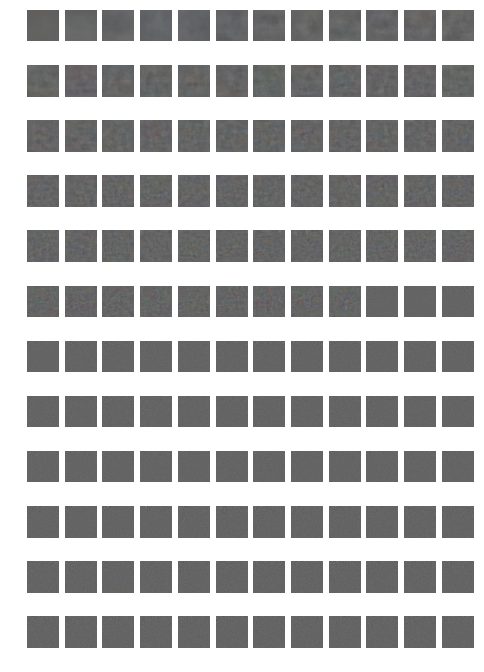

In [16]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

U_choose = U[:,:144]
# print(U_choose)
print(U_choose.shape)
samples_row = 12
samples_col = U_choose.shape[1] // samples_row
U_choose_plot = U_choose.reshape(32, 32, 3, -1)
U_min, U_max = np.min(U_choose_plot), np.max(U_choose_plot)
print(U_min, U_max)
print(U_choose_plot.shape)
for x in range(samples_row):
    for y in range(samples_col):
        plt_idx = x * samples_col + y + 1
        plt.subplot(samples_row, samples_col, plt_idx)
#         print(plt_idx - 1)
        U_img = 255.0 * (U_choose_plot[:, :, :, plt_idx -1].squeeze() - U_min) / (U_max - U_min)
#         print(U_img)
        plt.imshow(U_img.astype('uint8'))
        plt.axis('off')
plt.show()

(3072, 144)


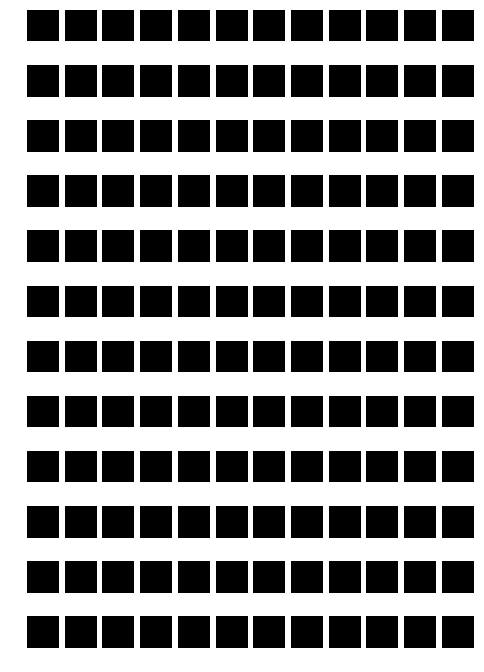

In [17]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

U_choose = U[:,:144]
print(U_choose.shape)
samples_row = 12
samples_col = U_choose.shape[1] // samples_row
U_choose_plot = U_choose.reshape(32, 32, 3, -1)

for x in range(samples_row):
    for y in range(samples_col):
        plt_idx = x * samples_col + y + 1
        plt.subplot(samples_row, samples_col, plt_idx)
        U_img = U_choose_plot[:, :, :, plt_idx -1]
        plt.imshow(U_img.astype('uint8'))
        plt.axis('off')
plt.show()

In [18]:
X_rot_rebuild = np.dot(Xrot_reduced, U.transpose()[:100,:])
print(X_rot_rebuild.shape)

(70, 3072)


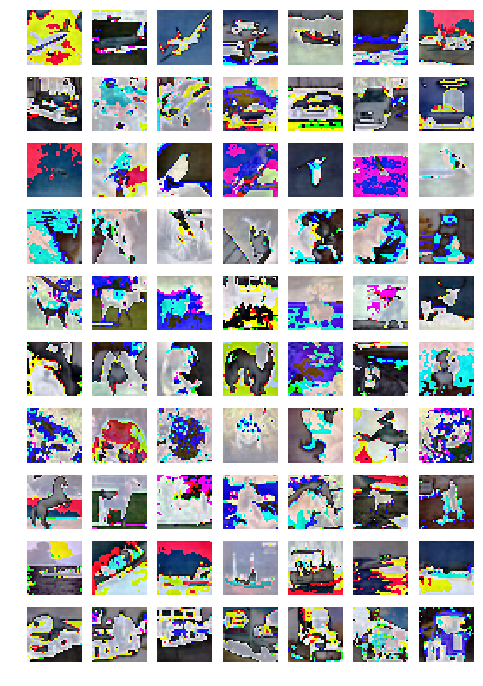

In [19]:
samples_row = 10
samples_col = X_rot_rebuild.shape[0] // samples_row

X_rot_plot = X_rot_rebuild.reshape(X_rot_rebuild.shape[0],32, 32, 3)

for x in range(samples_row):
    for y in range(samples_col):
        plt_idx = x * samples_col + y + 1
#         print(x,y)
        plt.subplot(samples_row, samples_col, plt_idx)
        plt.imshow(X_rot_plot[plt_idx -1].astype('uint8'))
        plt.axis('off')
plt.show()

In [20]:
X_white_reduced = np.dot(X_white, U[:,:100])
X_white_rebuild = np.dot(X_white_reduced, U.transpose()[:100,:])
print(X_white_rebuild.shape)

(70, 3072)


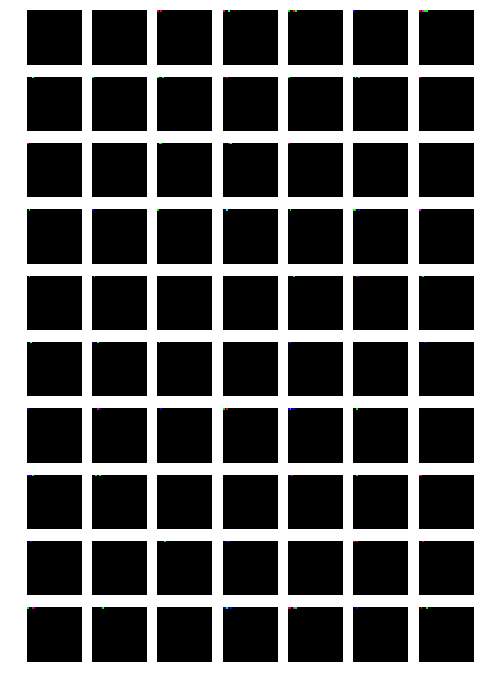

In [21]:
samples_row = 10
samples_col = X_white_rebuild.shape[0] // samples_row

X_white_plot = X_white_rebuild.reshape(X_white_rebuild.shape[0],32, 32, 3)

for x in range(samples_row):
    for y in range(samples_col):
        plt_idx = x * samples_col + y + 1
#         print(x,y)
        plt.subplot(samples_row, samples_col, plt_idx)
        plt.imshow(X_white_plot[plt_idx -1].astype('uint8'))
        plt.axis('off')
plt.show()